In [652]:
import sys,os
sys.path.append(os.getcwd())
sys.path.append(os.getcwd()[:-8]+'src')
from Algorithms import *
from metrics import *
plt.style.use('default')
plt.rcParams["font.family"] = "Arial"

In [875]:
n_stim = 50
n_neurons = 1000
n_pieces = 3
mlfd_gen = Manifold_Generator()
S1 = mlfd_gen(n_stim,'S1',1)
stim_angles = np.linspace(0,1,n_stim)

metric_used = geodesic_knn(k=4,adaptive=True).fit
Homologizer = Persistent_Homology()

projection = np.random.randn(n_neurons,2)
tun_curves = projection@S1
tun_curves = tun_curves[:,np.random.permutation(n_stim)]
for i in range(n_neurons):
    tun_curves[i] = np.polyval(np.polyfit(stim_angles, tun_curves[i],deg=18),stim_angles)

Text(0.5, 0, 'angle')

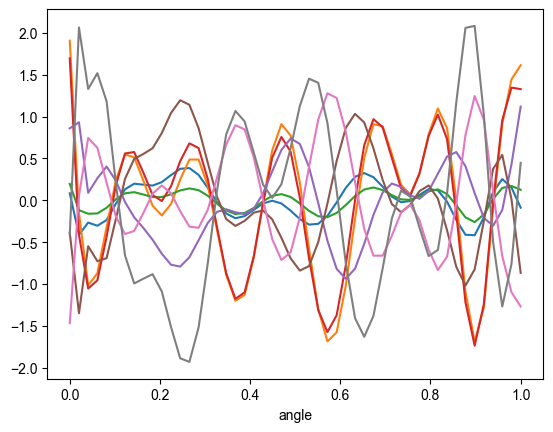

In [879]:
plt.plot(stim_angles,tun_curves[5:13].T)
plt.xlabel('angle')


1 significant 1-cocycles


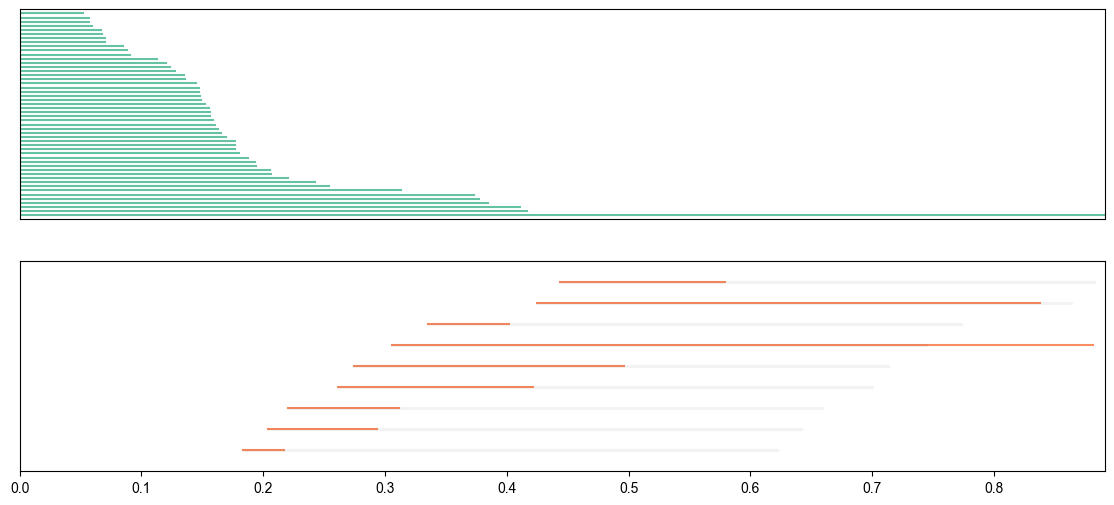

In [877]:
pvalue_hom_curves = Homologizer.perm_test(tun_curves.T,metric_used,n_perms=10,pval=100)
hom_curves = Homologizer(tun_curves.T,metric_used,False,0,[1,None])
Homologizer.barcode_plot(hom_curves[1],2,pval=pvalue_hom_curves[0])

In [794]:
tunning_means = np.linspace(-np.pi, np.pi, n_neurons)

opp_angle = np.pi
orth_tunning_neurons = np.zeros([n_neurons,n_stim])
kappa = 200
for i in range(n_neurons):
    orth_tunning_neurons[i,:] = (stats.vonmises(loc=tunning_means[i],kappa=kappa).pdf(stim_angles)+stats.vonmises(loc=(tunning_means[i]+opp_angle)%(2*np.pi),kappa=kappa).pdf(stim_angles))/2
#orth_tunning_neurons += 0.5*np.random.rand(n_neurons,n_stim)

Text(0.5, 0, 'angle')

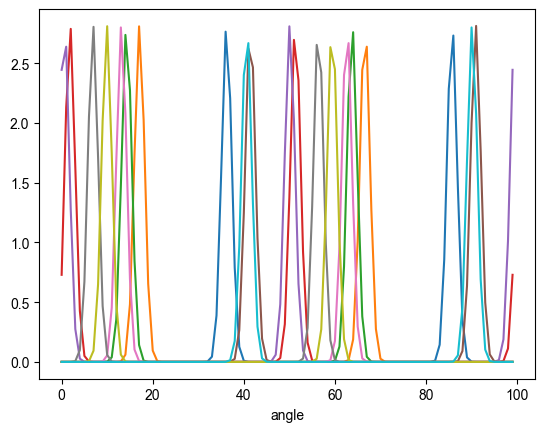

In [795]:
plt.plot(orth_tunning_neurons[np.random.randint(0,n_neurons,10)].T)
plt.xlabel('angle')

In [796]:
pvalue_hom = Homologizer.perm_test(orth_tunning_neurons.T,metric_used,n_perms=10,pval=100)
hom_data = Homologizer(orth_tunning_neurons.T,metric_used,False,0,[1,None])
cycle_lengths = hom_data[1][1][:,1]-hom_data[1][1][:,0]

1 significant 1-cocycles


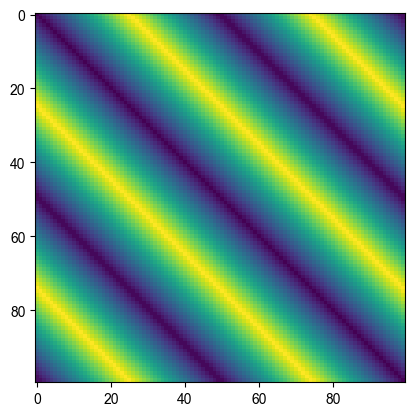

In [797]:
plt.imshow(hom_data[0])

In [798]:
reducer = umap.UMAP(n_neighbors=50,min_dist=0,n_components=2,metric='precomputed')
ori_mfld = reducer.fit_transform(hom_data[0])

/opt/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


Max cycle index is: 0


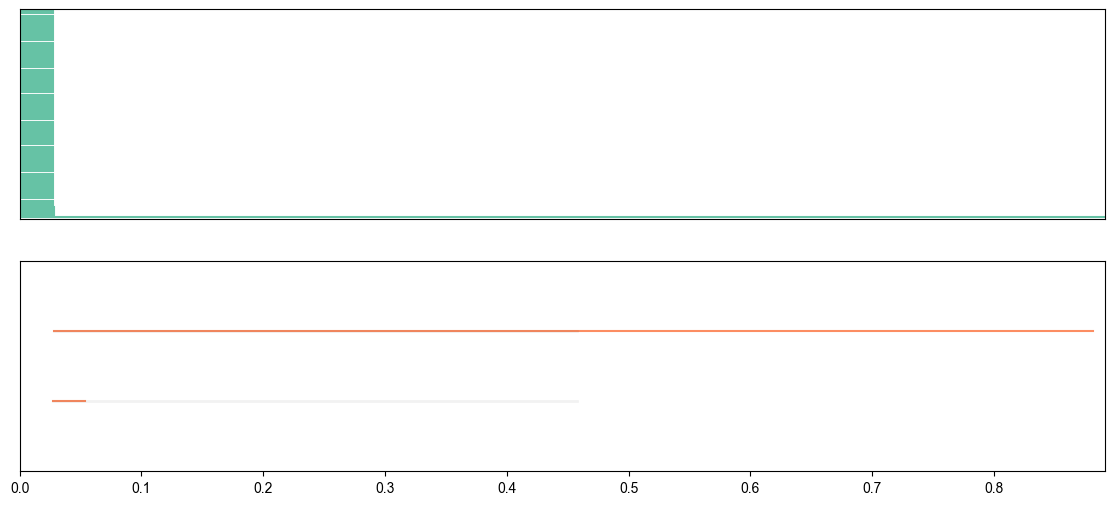

In [799]:
max_cycle = np.argsort(cycle_lengths).astype(int)[-1]
print('Max cycle index is: ' + str(max_cycle))
dmult=0.1
hom_crossection = hom_data[1][1][max_cycle][0]+ dmult*(hom_data[1][1][max_cycle][1]-hom_data[1][1][max_cycle][0])

Homologizer.barcode_plot(hom_data[1],2,pval=pvalue_hom[0])

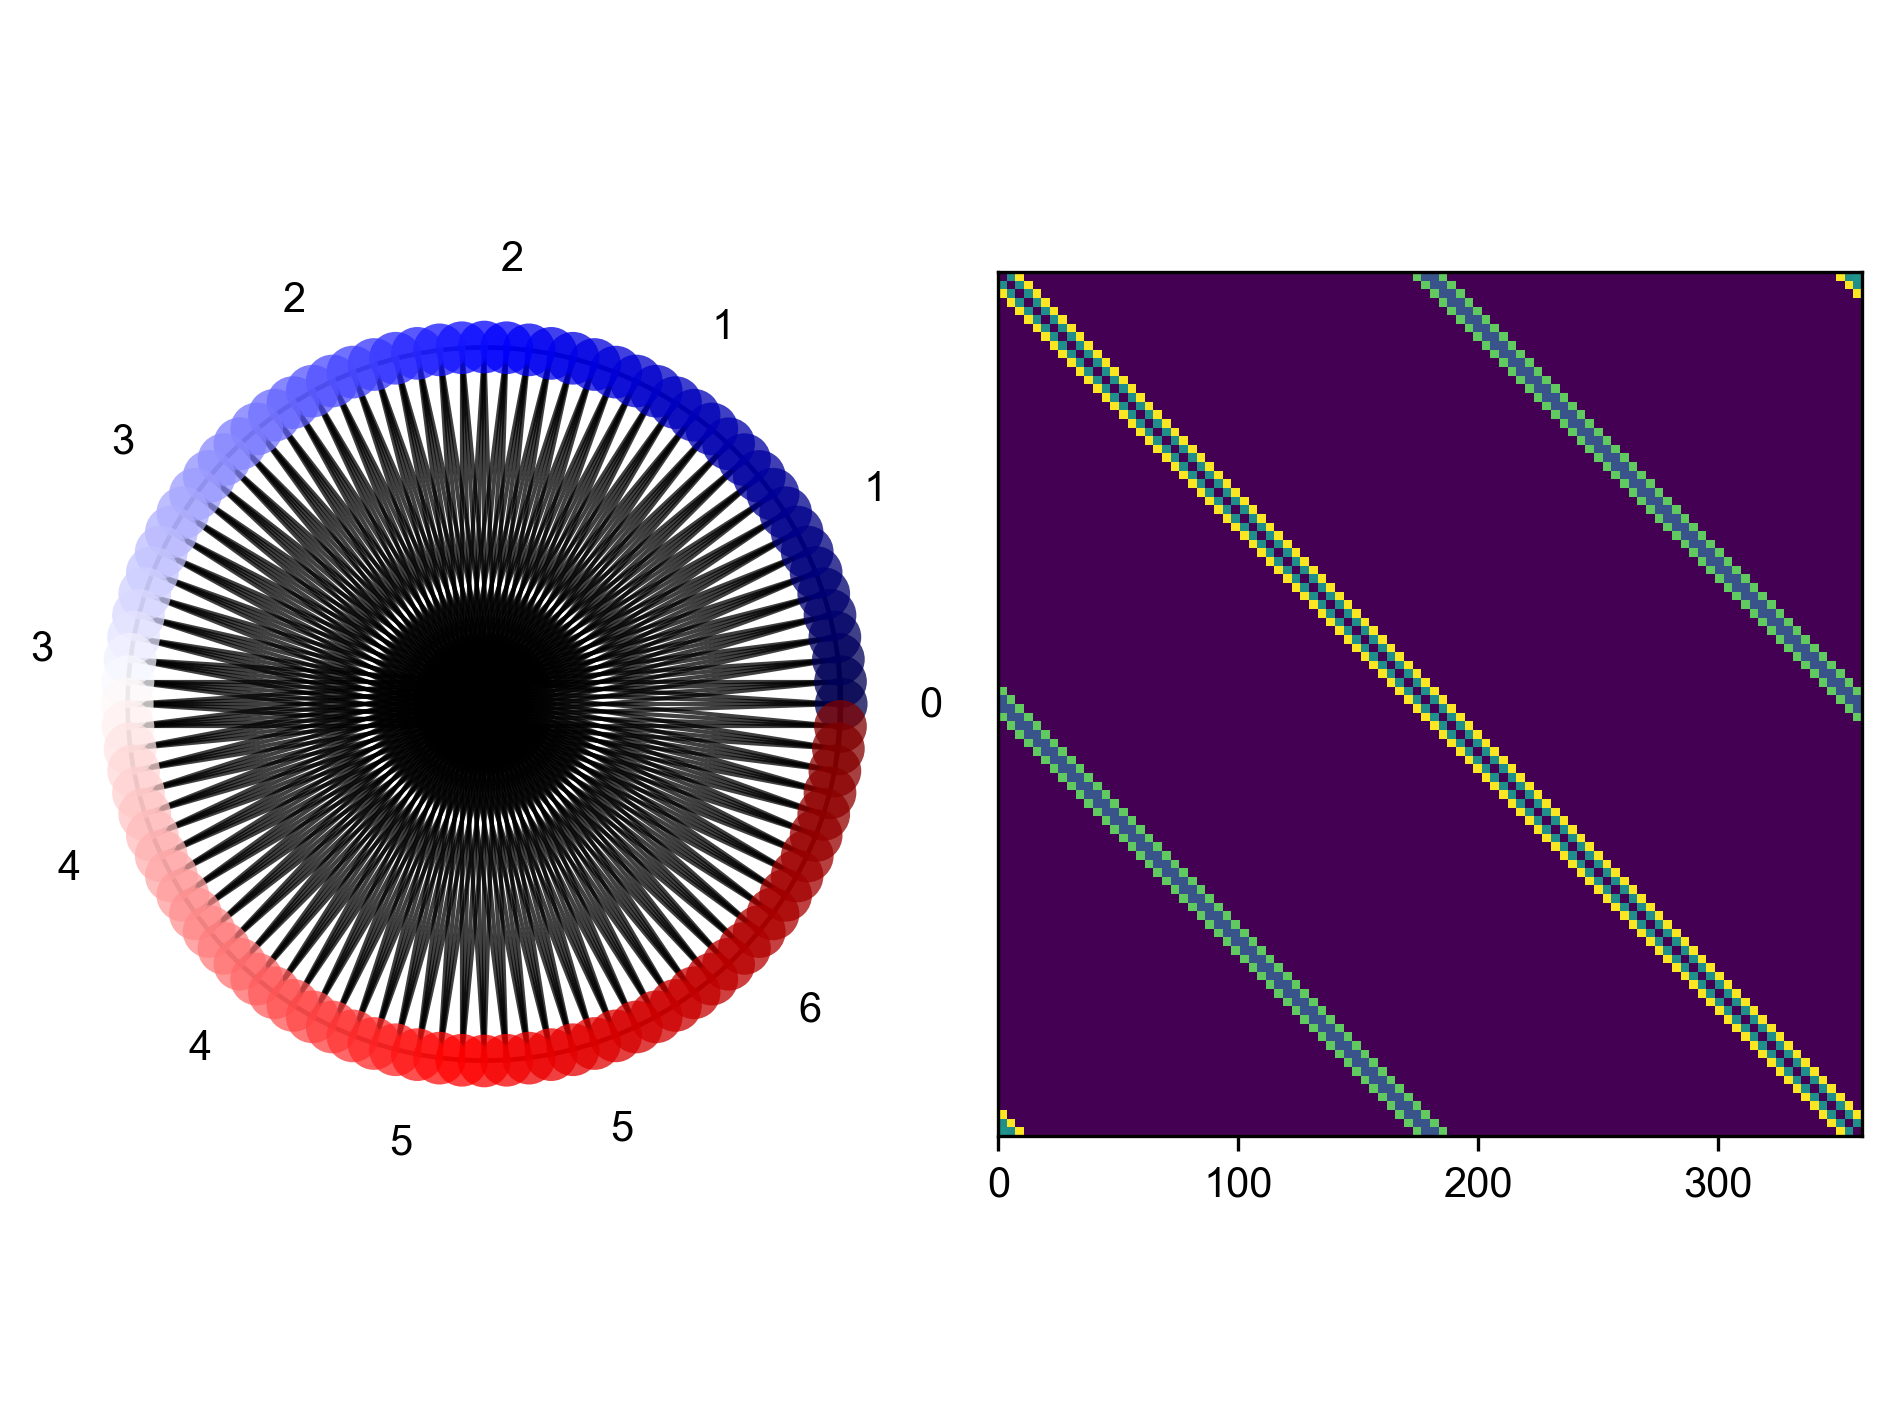

In [800]:
edge_dist = np.copy(hom_data[0])
edge_dist[edge_dist>hom_crossection] = 0

BA = Barcode_Analyzer()

plt.figure(dpi=300)
plt.subplot(121)
BA.plotCocycle2D(hom_data[0],ori_mfld[:,:2],hom_crossection,labels=stim_angles,node_cmap='seismic')
plt.subplot(122)
plt.imshow(edge_dist, extent=[0,360,360,0])
plt.yticks([])
plt.tight_layout()
#plt.savefig('Nmanifold_euclid.png')

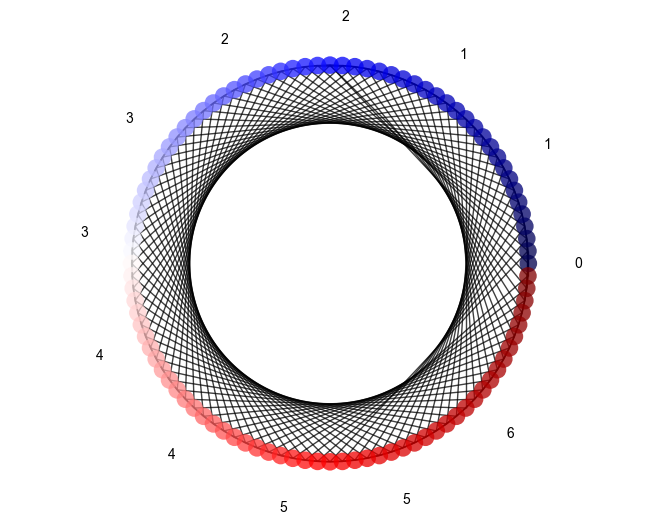

In [793]:
BA.plotCocycle2D(hom_data[0],ori_mfld[:,:2],hom_crossection,labels=stim_angles,node_cmap='seismic')